In [2]:
from datasets import load_dataset
from matplotlib import pyplot as plt
import pandas as pd
dataset=load_dataset('lukebarousse/data_jobs') 

c:\Users\pheli\anaconda3\envs\python_course\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
df=dataset['train'].to_pandas()

In [4]:
df['job_posted_date']=pd.to_datetime(df.job_posted_date)
df

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,None,NaN,NaN,Boehringer Ingelheim,None,None
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,"['r', 'python', 'sql', 'nosql', 'power bi', 't...","{'analyst_tools': ['power bi', 'tableau'], 'pr..."
2,Data Engineer,"Data Engineer/Scientist/Analyst, Mid or Senior...","Berlin, Germany",via LinkedIn,Full-time,False,Germany,2023-10-10 13:14:55,False,False,Germany,None,NaN,NaN,ALPHA Augmented Services,"['python', 'sql', 'c#', 'azure', 'airflow', 'd...","{'analyst_tools': ['dax'], 'cloud': ['azure'],..."
3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",2023-07-04 13:01:41,True,False,United States,None,NaN,NaN,Southwest Research Institute,"['python', 'c++', 'java', 'matlab', 'aws', 'te...","{'cloud': ['aws'], 'libraries': ['tensorflow',..."
4,Data Engineer,Data Engineer- Sr Jobs,"Washington, DC",via Clearance Jobs,Full-time,False,Sudan,2023-08-07 14:29:36,False,False,Sudan,None,NaN,NaN,Kristina Daniel,"['bash', 'python', 'oracle', 'aws', 'ansible',...","{'cloud': ['oracle', 'aws'], 'other': ['ansibl..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785736,Software Engineer,DevOps Engineer,Singapura,melalui Trabajo.org,Pekerjaan tetap,False,Singapore,2023-03-13 06:16:16,False,False,Singapore,None,NaN,NaN,CAREERSTAR INTERNATIONAL PTE. LTD.,"['bash', 'python', 'perl', 'linux', 'unix', 'k...","{'os': ['linux', 'unix'], 'other': ['kubernete..."
785737,Data Analyst,CRM Data Analyst,"Bad Rodach, Jerman",melalui BeBee Deutschland,Pekerjaan tetap,False,Germany,2023-03-12 06:18:18,False,False,Germany,None,NaN,NaN,HABA FAMILYGROUP,"['sas', 'sas', 'sql', 'excel']","{'analyst_tools': ['sas', 'excel'], 'programmi..."
785738,Business Analyst,Commercial Analyst - Start Now,Malaysia,melalui Ricebowl,Pekerjaan tetap,False,Malaysia,2023-03-12 06:32:36,False,False,Malaysia,None,NaN,NaN,Lendlease Corporation,"['powerpoint', 'excel']","{'analyst_tools': ['powerpoint', 'excel']}"
785739,Data Engineer,"Principal Associate, Data Engineer (Remote-Eli...","Newark, New Jersey, Amerika Serikat",melalui Recruit.net,Pekerjaan tetap,False,Sudan,2023-03-12 06:32:15,False,False,Sudan,None,NaN,NaN,Capital One,"['python', 'go', 'nosql', 'sql', 'mongo', 'she...","{'cloud': ['aws', 'snowflake', 'azure', 'redsh..."


In [5]:
import ast
def clean_list(skill_list):
    if pd.notna(skill_list):
       return ast.literal_eval(skill_list)
df['job_skills']=df['job_skills'].apply(clean_list)

In [6]:
df[['job_title_short','job_skills']].head()

,job_title_short,job_skills
0,Senior Data Engineer,None
1,Data Analyst,"[r, python, sql, nosql, power bi, tableau]"
2,Data Engineer,"[python, sql, c#, azure, airflow, dax, docker,..."
3,Data Engineer,"[python, c++, java, matlab, aws, tensorflow, k..."
4,Data Engineer,"[bash, python, oracle, aws, ansible, puppet, j..."


In [9]:
df_exploded=df.explode('job_skills')

<Axes: xlabel='job_skills'>

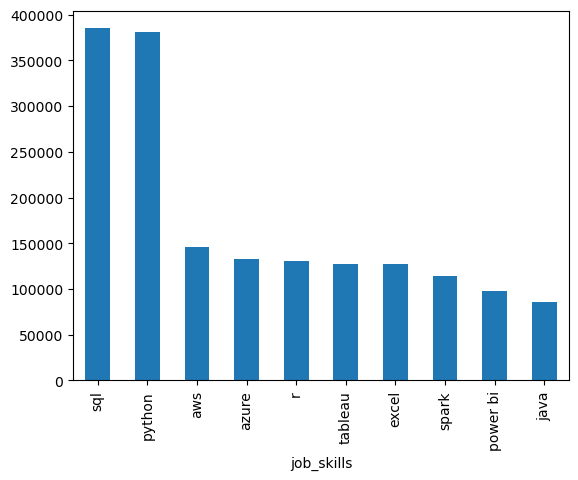

In [13]:
df_exploded['job_skills'].value_counts().head(10).plot(kind='bar')

In [20]:
skills_count=df_exploded.groupby(['job_title_short','job_skills']).size()
skills_count

job_title_short    job_skills
Business Analyst   airflow        318
                   airtable        17
                   alteryx       1078
                   angular         87
                   ansible        120
                                 ... 
Software Engineer  wrike            4
                   wsl             13
                   xamarin         35
                   yarn           145
                   zoom           229
Length: 2256, dtype: int64

In [19]:
type(skills_count)

pandas.core.series.Series

In [21]:
# changing from series to dataframe using reset index
df_skills_count=skills_count.reset_index(name='skill_count')
df_skills_count

,job_title_short,job_skills,skill_count
0,Business Analyst,airflow,318
1,Business Analyst,airtable,17
2,Business Analyst,alteryx,1078
3,Business Analyst,angular,87
4,Business Analyst,ansible,120
...,...,...,...
2251,Software Engineer,wrike,4
2252,Software Engineer,wsl,13
2253,Software Engineer,xamarin,35
2254,Software Engineer,yarn,145


In [24]:
df_skills_count=df_skills_count.sort_values(by='skill_count',ascending=False)
df_skills_count

,job_title_short,job_skills,skill_count
1066,Data Scientist,python,113711
865,Data Engineer,sql,113130
830,Data Engineer,python,108022
625,Data Analyst,sql,92428
1101,Data Scientist,sql,78982
...,...,...,...
776,Data Engineer,linode,1
1843,Senior Data Scientist,delphi,1
1888,Senior Data Scientist,kali,1
1289,Machine Learning Engineer,powerbi,1


Text(0.5, 1.0, 'Top10 skills for Data Engineer ')

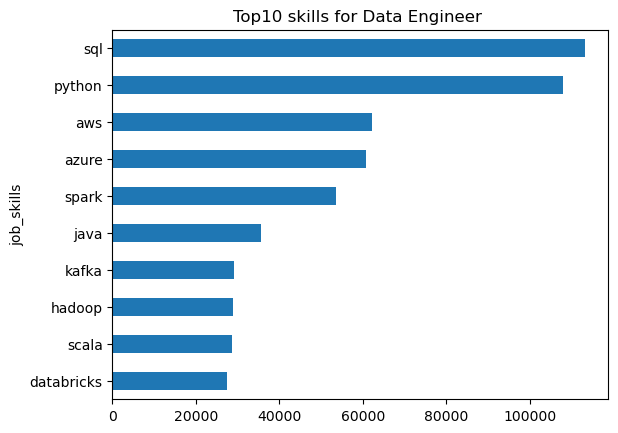

In [43]:
job_title='Data Engineer'
top_skill=10
df_skills_final=df_skills_count[df_skills_count['job_title_short']== job_title].head(top_skill)
df_skills_final.plot(kind='barh',x='job_skills',y='skill_count')
plt.gca().invert_yaxis()
plt.legend().set_visible(False)
plt.title(f'Top{top_skill} skills for {job_title} ')


In [ ]:
job_titles=['Data Analyst','Data Engineer','Data Scientist']

IndexError: index 0 is out of bounds for axis 0 with size 0

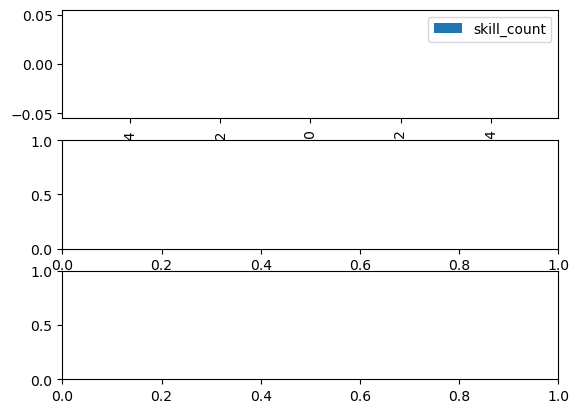

In [56]:
fig,ax=plt.subplots(3,1)
for i, job_title in enumerate(job_title):
    df_plot=df_skills_count[df_skills_count['job_title_short']==job_title].head(5)
    df_plot.plot(kind='bar',x='job_skills',y='skill_count',ax=ax[i])
    

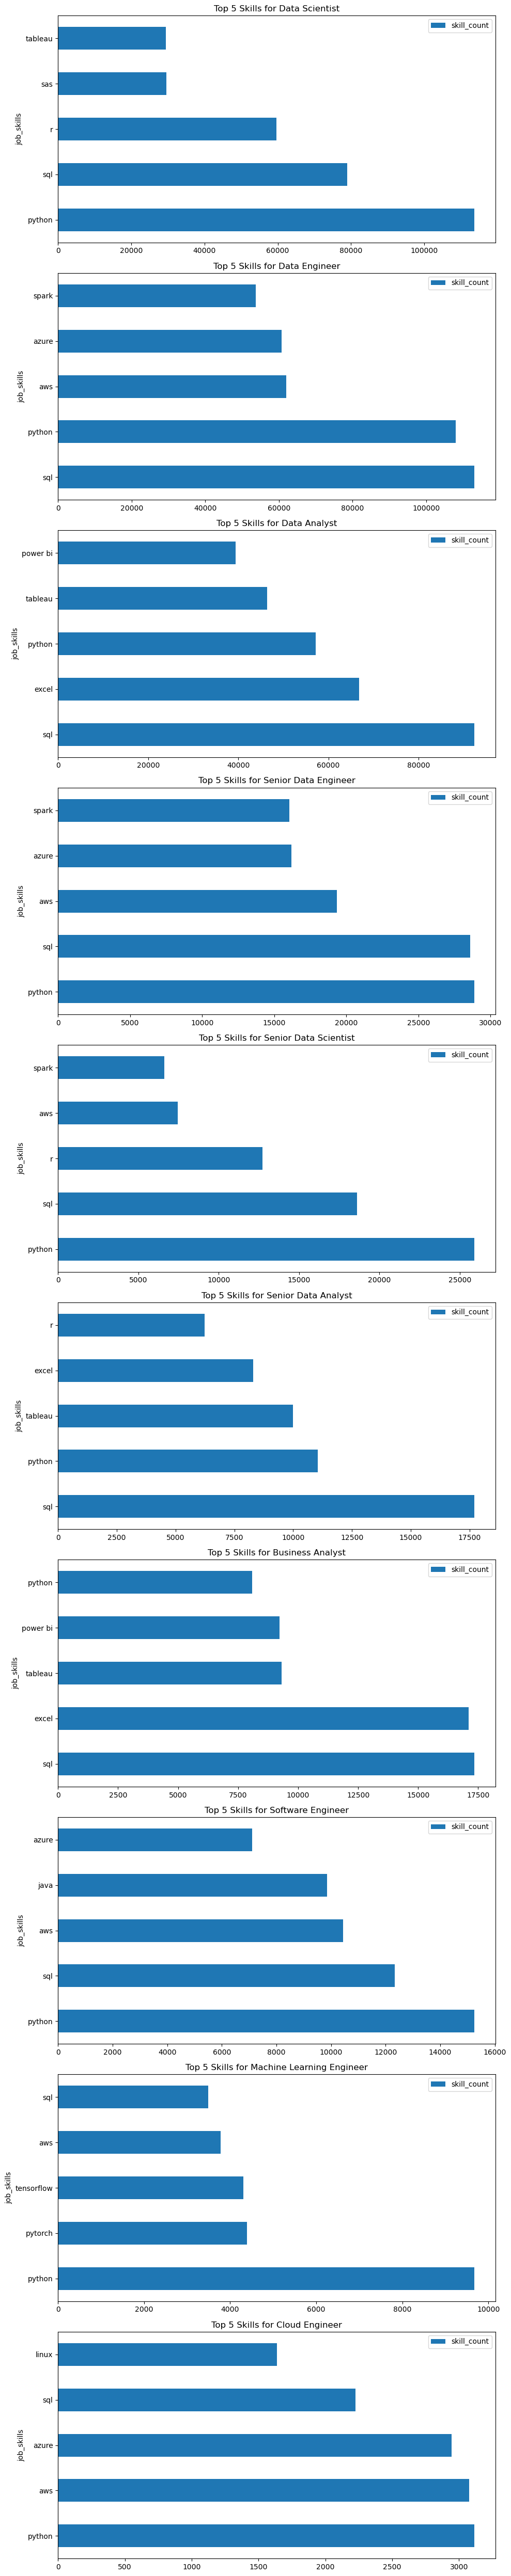

In [61]:
import matplotlib.pyplot as plt

# Get unique job titles
unique_job_titles = df_skills_count['job_title_short'].unique()

# Create subplots with the number of job titles
fig, ax = plt.subplots(len(unique_job_titles), 1, figsize=(10, len(unique_job_titles) * 5))

# If only one subplot, ax is not a list, so we convert it to a list
if len(unique_job_titles) == 1:
    ax = [ax]

# Plot each job title's top 5 skills
for i, job_title in enumerate(unique_job_titles):
    df_plot = df_skills_count[df_skills_count['job_title_short'] == job_title].head(5)
    df_plot.plot(kind='barh', x='job_skills', y='skill_count', ax=ax[i])
    ax[i].set_title(f'Top 5 Skills for {job_title}')
    
 

plt.tight_layout()
plt.show()
